<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Способ-1---Взвешивание" data-toc-modified-id="Способ-1---Взвешивание-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Способ 1 - Взвешивание</a></span></li><li><span><a href="#Способ-2---Увеличение-выборки" data-toc-modified-id="Способ-2---Увеличение-выборки-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Способ 2 - Увеличение выборки</a></span></li><li><span><a href="#Способ-3---Уменьшение-выборки" data-toc-modified-id="Способ-3---Уменьшение-выборки-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Способ 3 - Уменьшение выборки</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод.</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Введение

Цель исследования: 
построить модель, которая на основе информации о клиентах банка, спрогнозировала бы наиболее вероятное поведение клиента: уйдет он или нет.

Чтобы на основе полученной информации банк мог принять меры по удержанию клиента.

## Подготовка данных

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Проверим данные на пропущенные значения

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Вывод: пропущенные значения есть в поле Tenure

Проверим данные на дубликаты

In [5]:
df.duplicated().sum()

0

Вывод: явных дубликатов нет

Посмотрим распределения значений по параметрам

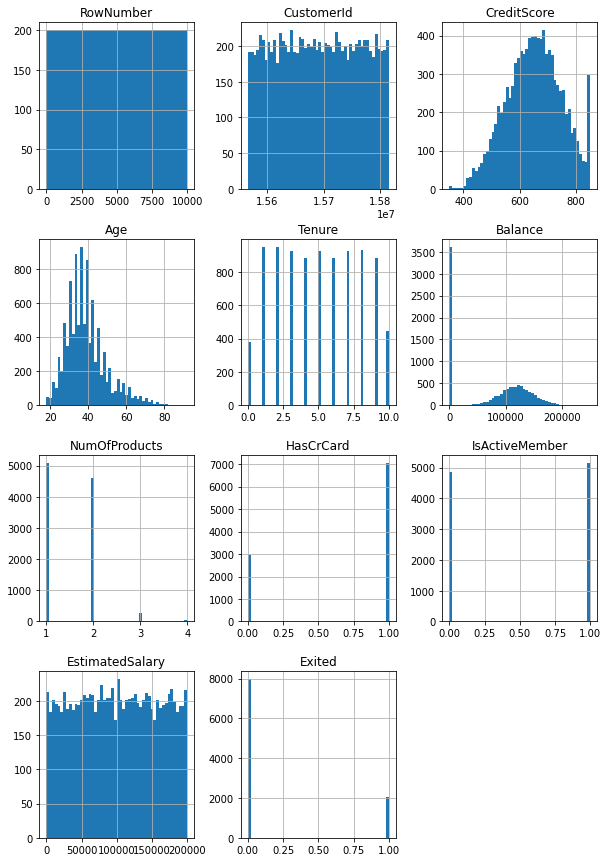

In [6]:
df.hist(bins=50, figsize=(10, 15));

Вывод: Явных необъяснимых аномалий не обнаружено. Всплеск в CreditScore в максимальном значении объясняется тем, что есть сегмент людей, у которых максимально возможный из существующих CreditScore, то есть всплеск объясняется просто тем что существует максимально возможное значение CreditScore. 
Всплеск в Balance в 0 объясняется тем, что существует сегмент, у которых есть договор с банком, но они не используют банковский счет в этом банкев своих операциях.

Подготовим данные для моделирования и разделим на обучающую (60%), валидационную (20%) и тестовую выборки (20%).

In [8]:
features = df.drop(['Exited'], axis=1)
target = df['Exited']

In [9]:
features_trv, features_test, target_trv, target_test = train_test_split(
    features, target, test_size=(1/5), random_state=12345)

In [10]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_trv, target_trv, test_size=(1/4), random_state=12345)

In [11]:
features_train.shape

(6000, 13)

In [12]:
features_valid.shape

(2000, 13)

In [13]:
features_test.shape

(2000, 13)

Преобразуем категориальные значения в dummy переменные, а также заполним пропущенные значения

In [14]:
encoder = OneHotEncoder(drop='first')

Features Train - преобразование и заполнение пропущенных значений

In [15]:
encoded_FT = encoder.fit_transform(features_train[['Gender','Geography']])
encoded_FT_array = encoded_FT.toarray()
encoded_varsFT = pd.DataFrame(encoded_FT.toarray(), columns=encoder.get_feature_names())
features_train = features_train.reset_index()
features_train = pd.concat([features_train, encoded_varsFT], axis=1)
features_train = features_train.drop(['index','RowNumber','CustomerId','Surname','Geography','Gender'],axis=1)

In [16]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_Male,x1_Germany,x1_Spain
0,639,38,4.0,81550.94,2,0,1,118974.77,0.0,0.0,0.0
1,554,44,NaN,85304.27,1,1,1,58076.52,1.0,0.0,0.0
2,714,53,1.0,99141.86,1,1,1,72496.05,1.0,1.0,0.0
3,556,61,2.0,117419.35,1,1,1,94153.83,0.0,0.0,0.0
4,707,46,7.0,127476.73,2,1,1,146011.55,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5995,592,36,10.0,123187.51,1,0,1,146111.35,1.0,1.0,0.0
5996,821,28,8.0,0.00,1,1,1,36754.13,0.0,0.0,0.0
5997,707,32,9.0,0.00,2,0,0,30807.02,1.0,0.0,0.0
5998,612,44,2.0,115163.38,1,1,1,97677.52,1.0,1.0,0.0


In [17]:
df3 = features_train

In [18]:
df3.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_Male,x1_Germany,x1_Spain
0,639,38,4.0,81550.94,2,0,1,118974.77,0.0,0.0,0.0
1,554,44,NaN,85304.27,1,1,1,58076.52,1.0,0.0,0.0
2,714,53,1.0,99141.86,1,1,1,72496.05,1.0,1.0,0.0
3,556,61,2.0,117419.35,1,1,1,94153.83,0.0,0.0,0.0
4,707,46,7.0,127476.73,2,1,1,146011.55,0.0,0.0,0.0


Теперь нужно решить проблему с пропущенными значениями в Tenure

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6000 non-null   int64  
 1   Age              6000 non-null   int64  
 2   Tenure           5430 non-null   float64
 3   Balance          6000 non-null   float64
 4   NumOfProducts    6000 non-null   int64  
 5   HasCrCard        6000 non-null   int64  
 6   IsActiveMember   6000 non-null   int64  
 7   EstimatedSalary  6000 non-null   float64
 8   x0_Male          6000 non-null   float64
 9   x1_Germany       6000 non-null   float64
 10  x1_Spain         6000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 515.8 KB


In [20]:
df3['Tenure'] = df3['Tenure'].fillna(99)

Посмотрим, насколько отличаются остальные переменные, в зависимости от "стажа" клиента (Tenure)

In [21]:
df3.pivot_table(index='Tenure', values=['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','x0_Male','x1_Germany','x1_Spain'], aggfunc = 'mean')

,Age,Balance,CreditScore,EstimatedSalary,HasCrCard,IsActiveMember,NumOfProducts,x0_Male,x1_Germany,x1_Spain
Tenure,,,,,,,,,,
0.0,39.416667,82394.478860,656.859649,94639.227719,0.627193,0.552632,1.421053,0.517544,0.280702,0.280702
1.0,39.465969,78215.368307,651.329843,102287.567766,0.650960,0.570681,1.483421,0.525305,0.273997,0.223386
2.0,39.071942,75622.765935,658.615108,98856.206241,0.712230,0.544964,1.582734,0.570144,0.255396,0.253597
3.0,39.304587,80307.370440,649.682569,96474.104697,0.706422,0.506422,1.519266,0.548624,0.262385,0.258716
4.0,37.710280,74141.201757,652.044860,99700.991159,0.710280,0.517757,1.491589,0.547664,0.241121,0.250467
5.0,38.740809,76609.687316,651.511029,100927.594412,0.711397,0.514706,1.566176,0.553309,0.257353,0.268382
6.0,38.680233,77849.624264,646.000000,101147.961589,0.728682,0.500000,1.503876,0.515504,0.238372,0.248062
7.0,38.062385,75110.540440,651.238532,102455.425633,0.700917,0.502752,1.532110,0.563303,0.214679,0.227523
8.0,38.730241,75754.273058,648.570447,100637.151907,0.747423,0.501718,1.522337,0.577320,0.252577,0.278351


Вывод: значимых отличий в зависимости от группы нет. Кроме того отличия в группе, где значение Tenure пропущено - также незначимы.
Поэтому мы можем пропущенные значения в группе Tenure заменить на среднее.

In [22]:
features_train['Tenure'] = features_train['Tenure'].fillna(features_train['Tenure'].mean())

In [23]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6000 non-null   int64  
 1   Age              6000 non-null   int64  
 2   Tenure           6000 non-null   float64
 3   Balance          6000 non-null   float64
 4   NumOfProducts    6000 non-null   int64  
 5   HasCrCard        6000 non-null   int64  
 6   IsActiveMember   6000 non-null   int64  
 7   EstimatedSalary  6000 non-null   float64
 8   x0_Male          6000 non-null   float64
 9   x1_Germany       6000 non-null   float64
 10  x1_Spain         6000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 515.8 KB


Features Valid - преобразование и заполнение пропущенных значений

In [24]:
encoded_FV = encoder.transform(features_valid[['Gender','Geography']])
encoded_FV_array = encoded_FV.toarray()
encoded_varsFV = pd.DataFrame(encoded_FV.toarray(), columns=encoder.get_feature_names())
features_valid = features_valid.reset_index()
features_valid = pd.concat([features_valid, encoded_varsFV], axis=1)
features_valid = features_valid.drop(['index','RowNumber','CustomerId','Surname','Geography','Gender'],axis=1)

In [25]:
features_valid['Tenure'] = features_valid['Tenure'].fillna(features_valid['Tenure'].mean())

Features Test - преобразование и заполнение пропущенных значений

In [26]:
encoded_FTe = encoder.transform(features_test[['Gender','Geography']])
encoded_FTe_array = encoded_FTe.toarray()
encoded_varsFTe = pd.DataFrame(encoded_FTe.toarray(), columns=encoder.get_feature_names())
features_test = features_test.reset_index()
features_test = pd.concat([features_test, encoded_varsFTe], axis=1)
features_test = features_test.drop(['index','RowNumber','CustomerId','Surname','Geography','Gender'],axis=1)

In [27]:
features_test['Tenure'] = features_test['Tenure'].fillna(features_test['Tenure'].mean())

In [28]:
len(features_train)

6000

In [29]:
len(features_valid)

2000

In [30]:
len(features_test)

2000

In [31]:
#features_train, target_train, features_valid, target_valid, features_test, target_test = train_valid_test_split(df3, target ='Exited', train_size = 0.6, valid_size = 0.2, test_size = 0.2)

In [32]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_Male,x1_Germany,x1_Spain
0,639,38,4.0,81550.94,2,0,1,118974.77,0.0,0.0,0.0
1,554,44,99.0,85304.27,1,1,1,58076.52,1.0,0.0,0.0
2,714,53,1.0,99141.86,1,1,1,72496.05,1.0,1.0,0.0
3,556,61,2.0,117419.35,1,1,1,94153.83,0.0,0.0,0.0
4,707,46,7.0,127476.73,2,1,1,146011.55,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5995,592,36,10.0,123187.51,1,0,1,146111.35,1.0,1.0,0.0
5996,821,28,8.0,0.00,1,1,1,36754.13,0.0,0.0,0.0
5997,707,32,9.0,0.00,2,0,0,30807.02,1.0,0.0,0.0
5998,612,44,2.0,115163.38,1,1,1,97677.52,1.0,1.0,0.0


Сделаем масштабирование признаков

In [33]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [34]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_Male,x1_Germany,x1_Spain
0,-0.134048,-0.078068,-0.359303,0.076163,0.816929,0,1,0.331571,0.0,0.0,0.0
1,-1.010798,0.494555,3.071054,0.136391,-0.896909,1,1,-0.727858,1.0,0.0,0.0
2,0.639554,1.353490,-0.467630,0.358435,-0.896909,1,1,-0.477006,1.0,1.0,0.0
3,-0.990168,2.116987,-0.431521,0.651725,-0.896909,1,1,-0.100232,0.0,0.0,0.0
4,0.567351,0.685430,-0.250976,0.813110,0.816929,1,1,0.801922,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.618839,-0.268942,-0.142649,0.744283,-0.896909,0,1,0.803658,1.0,1.0,0.0
5996,1.743227,-1.032439,-0.214867,-1.232442,-0.896909,1,1,-1.098797,0.0,0.0,0.0
5997,0.567351,-0.650691,-0.178758,-1.232442,0.816929,0,0,-1.202257,1.0,0.0,0.0
5998,-0.412545,0.494555,-0.431521,0.615524,-0.896909,1,1,-0.038931,1.0,1.0,0.0


In [35]:
target_train.reset_index(drop = True)

0       0
1       0
2       1
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    1
5999    0
Name: Exited, Length: 6000, dtype: int64

In [36]:
target_valid.reset_index(drop = True)

0       0
1       1
2       0
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: Exited, Length: 2000, dtype: int64

In [37]:
target_test.reset_index(drop = True)

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: Exited, Length: 2000, dtype: int64

Итог предобработки данных: заполнены пропущенные значения в Tenure (заменены средним), категориальные переменные заменены на dummy, проведено масштабирование признаков, данные разделены на обучающую, валидационную и тестовую выборки

## Исследование задачи

Сначала оценим баланс классов

In [38]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

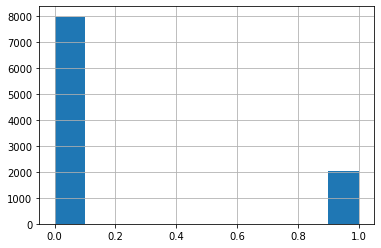

In [39]:
df['Exited'].hist();

Классы несбалансированы. Количество ушедших в 4 раза  меньше не ушедщих.

Сначала построим модель без учета баланса классов

Обучим и протестируем 2 модели: Decision Tree, Random Forest

Decision Tree

In [40]:
n = 50
best_model = None
best_result = 0
for depth in range(1, n):
    model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=depth,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=12345,
            splitter='best')  
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model_dt1 = model 
        best_result = result

print("F1:", best_result)
probabilities_valid = best_model_dt1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("roc_auc_score:", roc_auc_score(target_valid, probabilities_one_valid))
print("Параметры лучшей модели:", best_model_dt1)

F1: 0.5574803149606299
roc_auc_score: 0.8256037411046239
Параметры лучшей модели: DecisionTreeClassifier(max_depth=7, random_state=12345)


Random Forest

In [41]:
n = 30
k = 30
best_model = None
best_result = 0
for depth in range(5, k):
    for est in range(1, n):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, 
                                       max_depth=depth)
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_rf1 = model 
            best_result = result

print("F1:", best_result)
probabilities_valid = best_model_rf1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("roc_auc_score:", roc_auc_score(target_valid, probabilities_one_valid))
print("Параметры лучшей модели:", best_model_rf1)

F1: 0.5777080062794349
roc_auc_score: 0.8414505045945204
Параметры лучшей модели: RandomForestClassifier(max_depth=13, n_estimators=24, random_state=12345)


Вывод:  Random Forest показывает лучшие результаты по F1 и ROC-AUC

## Борьба с дисбалансом

#### Способ 1 - Взвешивание

Decision Tree

In [42]:
n = 50
best_model = None
best_result = 0
for depth in range(1, n):
    model = DecisionTreeClassifier(class_weight='balanced', criterion='gini', 
                                   max_depth=depth,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=12345,
            splitter='best')  
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model_dt2 = model 
        best_result = result

print("F1:", best_result)
probabilities_valid = best_model_dt2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("roc_auc_score:", roc_auc_score(target_valid, probabilities_one_valid))
print("Параметры лучшей модели:", best_model_dt2)

F1: 0.5572441742654509
roc_auc_score: 0.8065318326103647
Параметры лучшей модели: DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345)


Random Forest

In [43]:
n = 30
k = 30
best_model = None
best_result = 0
for depth in range(5, k):
    for est in range(1, n):
        model = RandomForestClassifier(class_weight='balanced',random_state=12345, 
                                       n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_rf2 = model 
            best_result = result

print("F1:", best_result)
probabilities_valid = best_model_rf2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("roc_auc_score:", roc_auc_score(target_valid, probabilities_one_valid))
print("Параметры лучшей модели:", best_model_rf2)

F1: 0.6024096385542169
roc_auc_score: 0.8457048666468507
Параметры лучшей модели: RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=24,
                       random_state=12345)


#### Способ 2 - Увеличение выборки

In [44]:
features_train = features_train.reset_index(drop=True)

In [45]:
target_train = target_train.reset_index(drop=True)

In [46]:
df4 = pd.concat([features_train, target_train], axis=1)
features_train = df4.drop(['Exited'], axis=1)
target_train = df4['Exited']

In [47]:
def upsample(features_train, target_train, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [48]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9657, 11)
(9657,)


In [49]:
target_upsampled.value_counts()

1    4876
0    4781
Name: Exited, dtype: int64

Decision Tree

In [50]:
n = 50
best_model = None
best_result = 0
for depth in range(1, n):
    model = DecisionTreeClassifier(class_weight=None, criterion='gini', 
                                   max_depth=depth,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=12345,
            splitter='best')  
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model_dt3 = model 
        best_result = result

print("F1:", best_result)
probabilities_valid = best_model_dt3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("roc_auc_score:", roc_auc_score(target_valid, probabilities_one_valid))
print("Параметры лучшей модели:", best_model_dt3)

F1: 0.5572441742654509
roc_auc_score: 0.8065191164151774
Параметры лучшей модели: DecisionTreeClassifier(max_depth=6, random_state=12345)


Random Forest

In [51]:
n = 30
k = 30
best_model = None
best_result = 0
for depth in range(5, k):
    for est in range(1, n):
        model = RandomForestClassifier(class_weight=None,random_state=12345, 
                                       n_estimators=est, max_depth=depth) 
        model.fit(features_upsampled, target_upsampled) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_rf3 = model 
            best_result = result

print("F1:", best_result)
probabilities_valid = best_model_rf3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("roc_auc_score:", roc_auc_score(target_valid, probabilities_one_valid))
print("Параметры лучшей модели:", best_model_rf3)

F1: 0.5978128797083839
roc_auc_score: 0.8296673602291458
Параметры лучшей модели: RandomForestClassifier(max_depth=13, n_estimators=8, random_state=12345)


#### Способ 3 - Уменьшение выборки

In [52]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled



In [53]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2414, 11)
(2414,)


In [54]:
target_downsampled.value_counts()

1    1219
0    1195
Name: Exited, dtype: int64

Decision Tree

In [55]:
n = 50
best_model = None
best_result = 0
for depth in range(1, n):
    model = DecisionTreeClassifier(class_weight=None, criterion='gini', 
                                   max_depth=depth,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=12345,
            splitter='best')  
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model_dt4 = model 
        best_result = result

print("F1:", best_result)
probabilities_valid = best_model_dt4.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("roc_auc_score:", roc_auc_score(target_valid, probabilities_one_valid))
print("Параметры лучшей модели:", best_model_dt4)

F1: 0.5452847805788982
roc_auc_score: 0.8126681915504061
Параметры лучшей модели: DecisionTreeClassifier(max_depth=7, random_state=12345)


Random forest

In [56]:
n = 30
k = 30
best_model = None
best_result = 0
for depth in range(5, k):
    for est in range(1, n):
        model = RandomForestClassifier(class_weight=None,random_state=12345, 
                                       n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_rf4 = model 
            best_result = result

print("F1:", best_result)
probabilities_valid = best_model_rf4.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("roc_auc_score:", roc_auc_score(target_valid, probabilities_one_valid))
print("Параметры лучшей модели:", best_model_rf4)

F1: 0.5700389105058367
roc_auc_score: 0.8349867036284073
Параметры лучшей модели: RandomForestClassifier(max_depth=9, n_estimators=7, random_state=12345)


Итог: построено 8 моделей: на 2 алгоритмах и 4 способах балансирования данных (без балансирования, взвешивание, увеличение выборки, уменьшение выборки).

Наиболее высокая F-мера (0.61) и ROC-AUC (0.84) получается, если мы используем алгоритм Random forest, а балансировку классов делаем путем взвешивания

## Тестирование модели

По результатам тестирования мы выбрали модель с алгоритмом Random Forest, и балансировкой классов путем взвешивания. Проверим модель на тестовой выборке.

In [57]:
#Random Forest
model = best_model_rf2 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print("F1:", f1_score(target_test, predicted_test))
print("roc_auc_score:", roc_auc_score(target_test, probabilities_one_test))
print("Параметры модели:", model)

F1: 0.6330049261083744
roc_auc_score: 0.8535525577254339
Параметры модели: RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=24,
                       random_state=12345)


Вывод: выбранная модель хорошо себя показала и на тестовой выборке: F1 = 0.62 (при минимуме 0.59), а ROC-AUC = 0.85. Модель рекомендуем в продакшн


## Общий вывод. 

Целью исследования было построить модель, которая на основе информации о клиентах банка, спрогнозировала бы наиболее вероятное поведение клиента: уйдет он или нет.
Что мы сделали в ходе исследования:
1. Были подготовлены данные: заполнены пропуски, преобразованы категориальные переменные, данные масштабированы, а также разбиты на обучающую (60%), валидационную (20%) и тестовую (20%) выборки.
2. Классы по целевой переменной (Exit) были несбалансированы (соотношение 1 к 4), поэтому было рассмотрено несколько подходов к их балансировке.
3. Обучено и проверено на валидационной выборке 8 моделей: 2 алгоритма (Decision Tree, Random Forest) и 4 подхода к балансироваке (без балансировки, взвешивание, уменьшение выборки, увеличение выборки.
4. Наилучший результат (F1 = 0.61, ROC-AUC 0.84) на валидационной выборке показала модель на алгоритме Random Forest и балансировке классов путем взвешивания.
5. Эта же модель показала хороший результат на тестовой выборке:  F1 = 0.62 (при минимуме 0.59), а ROC-AUC = 0.85. Эту модель рекомендуем в продакшн

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*